In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
dfCOVID19 = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
dfCOVID19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59942,ZWE,Africa,Zimbabwe,2021-01-09,20499.0,839.0,858.286,483.0,15.0,15.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59943,ZWE,Africa,Zimbabwe,2021-01-10,21477.0,978.0,887.429,507.0,24.0,18.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59944,ZWE,Africa,Zimbabwe,2021-01-11,22297.0,820.0,924.000,528.0,21.0,20.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59945,ZWE,Africa,Zimbabwe,2021-01-12,23239.0,942.0,863.571,551.0,23.0,19.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


<AxesSubplot:>

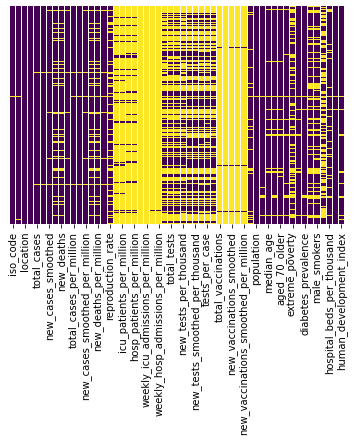

In [3]:
sns.heatmap(dfCOVID19.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
individualismIdex=pd.read_html('http://clearlycultural.com/geert-hofstede-cultural-dimensions/individualism/')[1]
individualismIdex.head()


,0,1,2,3,4,5
0,Country,PDI,IDV,MAS,UAI,LTO
1,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,40,91,62,46,29
3,Australia,36,90,61,51,31
4,United Kingdom,35,89,66,35,25


In [5]:
#individualismIdex=pd.DataFrame({'Countries': individualismIdex[0].to_numpy()[2:],
#                'PDI': individualismIdex[1].to_numpy()[2:],
#                'IDV': individualismIdex[2].to_numpy()[2:],
#                'MAS': individualismIdex[3].to_numpy()[2:],
#                'UAI': individualismIdex[4].to_numpy()[2:]})
#individualismIdex

In [6]:
individualismIdex=pd.DataFrame({
                'location': individualismIdex[0].to_numpy()[2:],
                'Power Distance Index': pd.to_numeric(individualismIdex[1].to_numpy()[2:]),
                'Individualism': pd.to_numeric(individualismIdex[2].to_numpy()[2:]),
                'Masculinity': pd.to_numeric(individualismIdex[3].to_numpy()[2:]),
                'Uncertainty Avoidance Index': pd.to_numeric(individualismIdex[4].to_numpy()[2:])})
individualismIdex

,location,Power Distance Index,Individualism,Masculinity,Uncertainty Avoidance Index
0,United States,40,91,62,46
1,Australia,36,90,61,51
2,United Kingdom,35,89,66,35
3,Netherlands,38,80,14,53
4,New Zealand,22,79,58,49
...,...,...,...,...,...
61,Colombia,67,13,64,80
62,Venezuela,81,12,73,76
63,Panama,95,11,44,86
64,Ecuador,78,8,63,67


<AxesSubplot:>

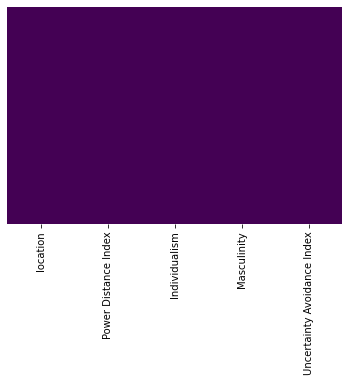

In [7]:
sns.heatmap(individualismIdex.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#pd.to_numeric(individualismIdex['PDI'])

In [9]:
df = pd.DataFrame({'month': [2, 5, 8, 10],
                   'year': [2017, 2019, 2018, 2019],
                   'sale': [60, 45, 90, 36]})
df

,month,year,sale
0,2,2017,60
1,5,2019,45
2,8,2018,90
3,10,2019,36


In [10]:
df['month']

0     2
1     5
2     8
3    10
Name: month, dtype: int64

In [11]:
individualismIdex.corr()

,Power Distance Index,Individualism,Masculinity,Uncertainty Avoidance Index
Power Distance Index,1.000000,-0.659981,0.075920,0.157426
Individualism,-0.659981,1.000000,0.090387,-0.210976
Masculinity,0.075920,0.090387,1.000000,0.050905
Uncertainty Avoidance Index,0.157426,-0.210976,0.050905,1.000000


In [12]:
df=pd.merge(individualismIdex,dfCOVID19,how='inner',on='location')

In [13]:
df.columns

Index(['location', 'Power Distance Index', 'Individualism', 'Masculinity',
       'Uncertainty Avoidance Index', 'iso_code', 'continent', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations

In [14]:
df.drop(['location', 'Power Distance Index', 'Individualism', 'Masculinity',
       'Uncertainty Avoidance Index', 'positive_rate',
       'life_expectancy', 'human_development_index'],axis=1)

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,USA,North America,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
1,USA,North America,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2,USA,North America,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
3,USA,North America,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
4,USA,North America,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,GTM,North America,2021-01-09,143127.0,1063.0,687.286,4999.0,27.0,24.571,7988.974,...,4.694,3.016,7423.808,8.7,155.898,10.18,NaN,NaN,76.665,0.60
21380,GTM,North America,2021-01-10,143243.0,116.0,681.143,5025.0,26.0,27.429,7995.449,...,4.694,3.016,7423.808,8.7,155.898,10.18,NaN,NaN,76.665,0.60
21381,GTM,North America,2021-01-11,143243.0,0.0,655.286,5025.0,0.0,27.143,7995.449,...,4.694,3.016,7423.808,8.7,155.898,10.18,NaN,NaN,76.665,0.60
21382,GTM,North America,2021-01-12,144982.0,1739.0,794.714,5080.0,55.0,31.571,8092.515,...,4.694,3.016,7423.808,8.7,155.898,10.18,NaN,NaN,76.665,0.60


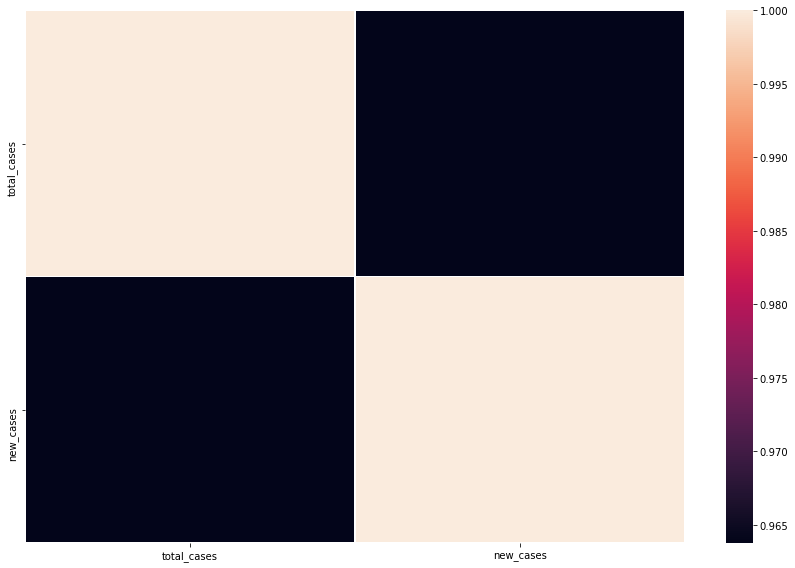

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(dfCOVID19[['total_cases','new_cases']].corr(),linewidths=.5)
plt.tight_layout()

In [16]:
#sns.pairplot(df)